<a href="https://colab.research.google.com/github/ksuma286/myprojects/blob/main/Online_Retail_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel('Online_Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df=df[['StockCode','Description','Quantity','InvoiceDate','UnitPrice','Country','CustomerID','InvoiceNo']]

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(406829, 8)

In [ ]:
df.isnull().sum()

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
CustomerID     0
InvoiceNo      0
dtype: int64

In [ ]:
df['Total']=df['Quantity']*df['UnitPrice']

In [ ]:
df[['Quantity','UnitPrice','Total']].head()

,Quantity,UnitPrice,Total
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [ ]:
df_total=df.groupby(['StockCode','Description'])['Total'].sum()

In [ ]:
df_total=pd.DataFrame(df_total)

In [ ]:
df_total.columns

Index(['Total'], dtype='object')

In [ ]:
df_total=df_total['Total'].sort_values(ascending=False)

The top ten selling stock are

In [ ]:
df_total.head(10)

StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              132870.40
85123A     WHITE HANGING HEART T-LIGHT HOLDER     93823.85
85099B     JUMBO BAG RED RETROSPOT                83236.76
47566      PARTY BUNTING                          67687.53
POST       POSTAGE                                66710.24
84879      ASSORTED COLOUR BIRD ORNAMENT          56499.22
23084      RABBIT NIGHT LIGHT                     51137.80
79321      CHILLI LIGHTS                          45936.81
22086      PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
22502      PICNIC BASKET WICKER 60 PIECES         39619.50
Name: Total, dtype: float64

The top ten least revenue generating stock are

In [ ]:
df_total.tail(10)

StockCode  Description                    
20703      BLUE PADDED SOFT MOBILE              -25.50
79323P     PINK CHERRY LIGHTS                   -27.00
21645      ASSORTED TUTTI FRUTTI ROUND BOX      -39.60
35400      WOODEN BOX ADVENT CALENDAR           -45.70
85063      CREAM SWEETHEART MAGAZINE RACK       -46.85
79323W     WHITE CHERRY LIGHTS                  -54.00
22769      CHALKBOARD KITCHEN ORGANISER         -87.80
D          Discount                           -5696.22
CRUK       CRUK Commission                    -7933.43
M          Manual                            -58385.46
Name: Total, dtype: float64

In [ ]:
df['Description'].nunique()

3896

top ten items sold

In [ ]:
df_stock_count=df.groupby(['StockCode','Description'])['Quantity'].sum()

In [ ]:
df_stock_count=pd.DataFrame(df_stock_count)

In [ ]:
df_stock_count.head()

,,Quantity
StockCode,Description,
10002,INFLATABLE POLITICAL GLOBE,823
10080,GROOVY CACTUS INFLATABLE,291
10120,DOGGY RUBBER,193
10125,MINI FUNKY DESIGN TAPES,1226
10133,COLOURING PENCILS BROWN TUBE,2374


In [ ]:
df_stock_count.columns

Index(['Quantity'], dtype='object')

In [ ]:
df_stock_count=df_stock_count['Quantity'].sort_values(ascending=False)

In [ ]:
df_stock_count.shape

(3916,)

In [ ]:
df_stock_count.head(10)

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
85099B     JUMBO BAG RED RETROSPOT               45066
84879      ASSORTED COLOUR BIRD ORNAMENT         35314
85123A     WHITE HANGING HEART T-LIGHT HOLDER    34147
21212      PACK OF 72 RETROSPOT CAKE CASES       33409
22197      POPCORN HOLDER                        30504
23084      RABBIT NIGHT LIGHT                    27094
22492      MINI PAINT SET VINTAGE                25880
22616      PACK OF 12 LONDON TISSUES             25321
21977      PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64

top ten least selling items

In [ ]:
df_stock_count.tail(10)

StockCode  Description                        
35400      WOODEN BOX ADVENT CALENDAR               -6
21412      VINTAGE GOLD TINSEL REEL                 -6
20703      BLUE PADDED SOFT MOBILE                  -6
79323W     WHITE CHERRY LIGHTS                      -8
22034      ROBIN CHRISTMAS CARD                     -9
21144      PINK POODLE HANGING DECORATION          -12
CRUK       CRUK Commission                         -16
21645      ASSORTED TUTTI FRUTTI ROUND BOX         -24
D          Discount                              -1194
84347      ROTATING SILVER ANGELS T-LIGHT HLDR   -1460
Name: Quantity, dtype: int64

In [ ]:
df_country=df[['StockCode','Description','Country','Quantity','UnitPrice','CustomerID','Total']]

In [ ]:
df_country.columns

Index(['StockCode', 'Description', 'Country', 'Quantity', 'UnitPrice',
       'CustomerID', 'Total'],
      dtype='object')

In [ ]:
dfc=df_country.groupby('Country')['CustomerID'].nunique()

In [ ]:
dfc.shape

(37,)

In [ ]:
dfc=dfc.sort_values(ascending=False)

In [ ]:
dfc_10=dfc.iloc[:10,]

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cusstomer Count')

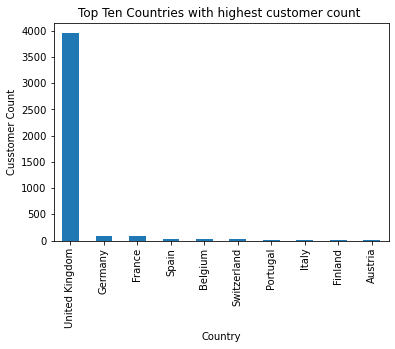

In [ ]:
dfc_10.plot(kind='bar')
plt.title('Top Ten Countries with highest customer count ')
plt.ylabel('Cusstomer Count')

In [ ]:
import seaborn as sns

In [ ]:
dfcs=df_country.groupby('Country')['Total'].sum()

In [ ]:
dfcs.head()

Country
Australia    137077.27
Austria       10154.32
Bahrain         548.40
Belgium       40910.96
Brazil         1143.60
Name: Total, dtype: float64

In [ ]:
dfcs=dfcs.sort_values(ascending=False)

In [ ]:
dfcs_5=dfcs.iloc[:5,]

Text(0.5, 1.0, 'Renenue of top five sales performing countries')

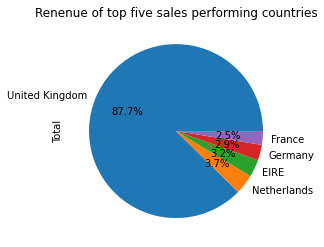

In [ ]:
dfcs_5.plot(kind='pie',autopct='%1.1f%%')
plt.title('Renenue of top five sales performing countries')


In [ ]:
df['InvoiceDate'].dtypes

dtype('<M8[ns]')

In [ ]:
df['Invoice_year']=df['InvoiceDate'].dt.year


In [ ]:
df['Invoice_year'].head()

0    2010
1    2010
2    2010
3    2010
4    2010
Name: Invoice_year, dtype: int64

Text(0, 0.5, 'Number of Invoices')

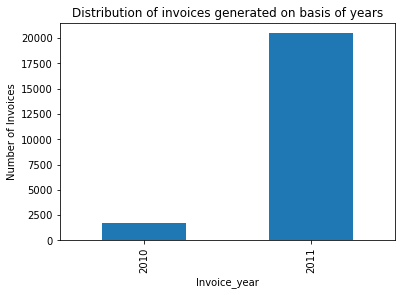

In [ ]:
df.groupby('Invoice_year')['InvoiceNo'].nunique().plot(kind='bar')
plt.title('Distribution of invoices generated on basis of years')
plt.ylabel('Number of Invoices')

In [ ]:
df_2011_m=df[df['Invoice_year']==2011]

In [ ]:
df_2011_m['month']=df_2011_m['InvoiceDate'].dt.month

/var/folders/db/5lq6wtyx2y39rtvf97mrmwfm0000gn/T/ipykernel_6135/657462859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011_m['month']=df_2011_m['InvoiceDate'].dt.month


In [ ]:
df_2011_m['month'].head()

42481    1
42482    1
42483    1
42484    1
42485    1
Name: month, dtype: int64

In [ ]:
df_m={1:'January',2:'Februrary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',9:'November',10:'December'}

In [ ]:
df_2011_m['month']=df_2011_m['month'].map(df_m)

/var/folders/db/5lq6wtyx2y39rtvf97mrmwfm0000gn/T/ipykernel_6135/4140849021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011_m['month']=df_2011_m['month'].map(df_m)


In [ ]:
df_2011_m['month'].head()

42481    January
42482    January
42483    January
42484    January
42485    January
Name: month, dtype: object

Text(0, 0.5, 'Number of Invoices')

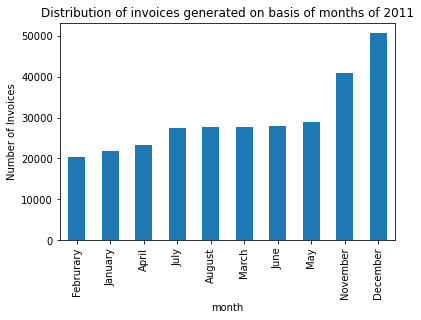

In [ ]:
df_2011_m.groupby('month')['InvoiceNo'].count().sort_values().plot(kind='bar')
plt.title('Distribution of invoices generated on basis of months of 2011')
plt.ylabel('Number of Invoices')

Text(0.5, 1.0, 'Distribution of revenue on basis of months of 2011')

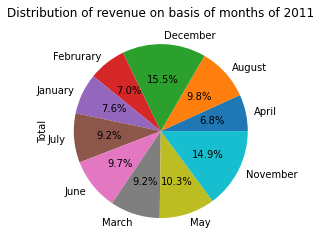

In [ ]:
df_2011_m.groupby('month')['Total'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of revenue on basis of months of 2011')

In [ ]:
df_top_ten_repeated_customers_sales=df.groupby('CustomerID')['Total'].sum().sort_values(ascending=False).iloc[:10,]

#top ten customers who paid the most to purchase

Text(0, 0.5, 'Amount spent')

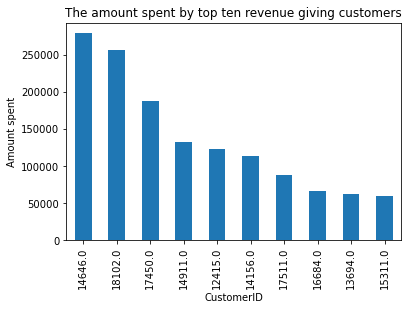

In [ ]:
df_top_ten_repeated_customers_sales.plot(kind='bar')
plt.title('The amount spent by top ten revenue giving customers')
plt.ylabel('Amount spent')

In [ ]:
df_days=df.sort_values(by='CustomerID')

In [ ]:
df_days.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,InvoiceNo,Total,Invoice_year
61619,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,12346.0,541431,77183.6,2011
61624,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,United Kingdom,12346.0,C541433,-77183.6,2011
286628,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,Iceland,12347.0,562032,13.5,2011
72263,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,Iceland,12347.0,542237,12.5,2011
72264,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,Iceland,12347.0,542237,12.5,2011


In [ ]:
#fucntion tot calculate the number of days between each purchases of customers

In [ ]:
df_days=df[['CustomerID','InvoiceDate','InvoiceNo']]

In [ ]:
df_days.duplicated().sum()

384608

In [ ]:
df_days.drop_duplicates(inplace=True)

/Users/sumakari/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_days.duplicated().sum()

0

In [ ]:
df_days.shape

(22221, 3)

In [ ]:
k=[]
for i in range(22221):
    k.append(i)

In [ ]:
df_days=df_days.reset_index()

In [ ]:
df_days.shape

(22221, 4)

In [ ]:
df_days.head()

,index,CustomerID,InvoiceDate,InvoiceNo
0,0,17850.0,2010-12-01 08:26:00,536365
1,7,17850.0,2010-12-01 08:28:00,536366
2,9,13047.0,2010-12-01 08:34:00,536367
3,21,13047.0,2010-12-01 08:34:00,536368
4,25,13047.0,2010-12-01 08:35:00,536369


In [ ]:
df_days.drop(['index'],axis=1,inplace=True)

In [ ]:
df_days.head()

,CustomerID,InvoiceDate,InvoiceNo
0,17850.0,2010-12-01 08:26:00,536365
1,17850.0,2010-12-01 08:28:00,536366
2,13047.0,2010-12-01 08:34:00,536367
3,13047.0,2010-12-01 08:34:00,536368
4,13047.0,2010-12-01 08:35:00,536369


In [ ]:
df_days['days_between_purchases']=0

In [ ]:
df_days['InvoiceDate']=pd.to_datetime(df_days['InvoiceDate'])

In [ ]:
df_days['InvoiceDate']=df_days['InvoiceDate'].dt.date

In [ ]:
for i in df_days.index:
    j=i+1
    if j!=22221:
        if df_days.loc[i,'CustomerID']==df_days.loc[j,'CustomerID']:
            df_days.loc[i,'days_between_purchases']=df_days.loc[j,'InvoiceDate']-df_days.loc[i,'InvoiceDate']


last value cannot be calculated hence if j!=22221 as 22221 is last cell and there is no cell 22222 which can be used to subrtrat 22221-22222

In [ ]:
df_days['InvoiceDate'].head()

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
Name: InvoiceDate, dtype: object

In [ ]:

df_days.loc[:,'days_between_purchases']

0        0:00:00
1              0
2        0:00:00
3        0:00:00
4              0
          ...   
22216    0:00:00
22217          0
22218          0
22219          0
22220          0
Name: days_between_purchases, Length: 22221, dtype: object

In [ ]:
df_days.tail(150)

,CustomerID,InvoiceDate,InvoiceNo,days_between_purchases
22071,14135.0,2011-12-08,581291,0
22072,16933.0,2011-12-08,C581305,0
22073,16442.0,2011-12-08,581310,0
22074,12523.0,2011-12-08,C581316,0
22075,18223.0,2011-12-08,C581322,0
...,...,...,...,...
22216,13777.0,2011-12-09,581583,0:00:00
22217,13777.0,2011-12-09,581584,0
22218,15804.0,2011-12-09,581585,0
22219,13113.0,2011-12-09,581586,0


In [ ]:
df_days['days_between_purchases'].value_counts()

0                  20773
0:00:00             1447
2 days, 0:00:00        1
Name: days_between_purchases, dtype: int64